In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [111]:
train_path= pd.read_csv('IA1_train.csv')
val_path= pd.read_csv('IA1_dev.csv')
val_path

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3211200460,8/6/2014,4,1.00,1520,9800,1.5,0,0,4,...,1520,0,1971,0,98034,47.7303,-122.236,1540,7700,3.8900
1,4124000320,3/16/2015,3,2.25,1800,15903,1.0,0,0,3,...,1340,460,1986,0,98038,47.3813,-122.043,2000,15233,3.3562
2,7129302800,12/12/2014,3,1.50,1780,5000,1.0,0,4,4,...,1030,750,1958,0,98118,47.5168,-122.256,1780,7500,4.2000
3,1392800035,6/18/2014,2,1.00,1240,6400,1.0,0,1,4,...,1060,180,1938,0,98126,47.5493,-122.377,1240,6400,5.5900
4,2154900040,10/30/2014,3,2.25,2190,8834,1.0,0,0,3,...,1390,800,1987,0,98001,47.2633,-122.244,1490,8766,1.9425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5132000140,1/20/2015,6,1.00,1370,5080,1.5,0,0,3,...,1120,250,1931,0,98106,47.5238,-122.350,1020,5080,4.1500
1996,6624010170,5/8/2014,3,1.75,1390,7399,1.0,0,0,4,...,1390,0,1975,0,98031,47.4183,-122.182,1460,7800,2.4600
1997,1853080840,2/11/2015,5,3.50,3700,7055,2.0,0,0,3,...,3700,0,2014,0,98074,47.5929,-122.057,3170,6527,8.8995
1998,2767601311,10/24/2014,3,2.50,1260,1102,3.0,0,0,3,...,1260,0,2007,0,98107,47.6750,-122.387,1320,2500,4.4500


In [112]:
#remove the ID column from both training and validation data
train_without_id = train_path.drop(columns=['id'])
train_without_id.dtypes
test_without_id = val_path.drop(columns=['id'])
test_without_id.dtypes

date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [113]:
#change date into 3 numerical features day, month and year
train_without_id['date']=pd.to_datetime(train_without_id['date'], format='%m/%d/%Y')
#extract month, day and year into separate columns
train_without_id['SaleMonth']= train_without_id['date'].dt.month
train_without_id['SaleDat']= train_without_id['date'].dt.day
train_without_id['SaleYear']= train_without_id['date'].dt.year
#drop the original date column
train_without_id=train_without_id.drop(columns=['date'])
train_without_id.dtypes



bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
SaleMonth          int32
SaleDat            int32
SaleYear           int32
dtype: object

In [114]:
test_without_id['date']=pd.to_datetime(test_without_id['date'], format='%m/%d/%Y')
#extract month, day and year into separate columns
test_without_id['SaleMonth']= test_without_id['date'].dt.month
test_without_id['SaleDat']= test_without_id['date'].dt.day
test_without_id['SaleYear']= test_without_id['date'].dt.year
#drop the original date column
test_without_id=test_without_id.drop(columns=['date'])
test_without_id.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
SaleMonth          int32
SaleDat            int32
SaleYear           int32
dtype: object

In [115]:
#The feature yr_renovated is set to 0 if the house has not been renovated
train_without_id['age_since_renovated']=np.where(train_without_id['yr_renovated']!=0, 2024-train_without_id['yr_renovated'], 2024-train_without_id['yr_built'])
train_without_id
test_without_id['age_since_renovated']=np.where(test_without_id['yr_renovated']!=0, 2024-test_without_id['yr_renovated'], 2024-test_without_id['yr_built'])
test_without_id
#unique_bedrooms=sorted(train_without_id['age_since_renovated'].unique())
#unique_bedrooms


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,SaleMonth,SaleDat,SaleYear,age_since_renovated
0,4,1.00,1520,9800,1.5,0,0,4,7,1520,...,98034,47.7303,-122.236,1540,7700,3.8900,8,6,2014,53
1,3,2.25,1800,15903,1.0,0,0,3,8,1340,...,98038,47.3813,-122.043,2000,15233,3.3562,3,16,2015,38
2,3,1.50,1780,5000,1.0,0,4,4,7,1030,...,98118,47.5168,-122.256,1780,7500,4.2000,12,12,2014,66
3,2,1.00,1240,6400,1.0,0,1,4,7,1060,...,98126,47.5493,-122.377,1240,6400,5.5900,6,18,2014,86
4,3,2.25,2190,8834,1.0,0,0,3,7,1390,...,98001,47.2633,-122.244,1490,8766,1.9425,10,30,2014,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6,1.00,1370,5080,1.5,0,0,3,6,1120,...,98106,47.5238,-122.350,1020,5080,4.1500,1,20,2015,93
1996,3,1.75,1390,7399,1.0,0,0,4,7,1390,...,98031,47.4183,-122.182,1460,7800,2.4600,5,8,2014,49
1997,5,3.50,3700,7055,2.0,0,0,3,9,3700,...,98074,47.5929,-122.057,3170,6527,8.8995,2,11,2015,10
1998,3,2.50,1260,1102,3.0,0,0,3,8,1260,...,98107,47.6750,-122.387,1320,2500,4.4500,10,24,2014,17


In [116]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y_train=train_without_id['price']
train_without_price=train_without_id.drop(columns=['price','yr_renovated'])
scaler.fit(train_without_price)
scaler_train=scaler.transform(train_without_price)
len(scaler_train[0])

21

In [117]:

y_test=test_without_id['price']
test_without_price=test_without_id.drop(columns=['price','yr_renovated'])
scaler.fit(test_without_price)
scaler_test=scaler.transform(test_without_price)
len(scaler_test[0])


21

In [118]:
#Part 1 (15 pts) Generate closed-form solution for reference.
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaler_train, y_train)
y_pred = lr_model.predict(scaler_test)

print("Prediction on training set:", y_pred)
#print("Accuracy on training set:", lr_model.score(X, y))
print(y_test)

from sklearn.metrics import mean_squared_error
rmse_test=mean_squared_error(y_test,y_pred)
print(rmse_train)


Prediction on training set: [4.37057919 3.43088983 6.02869848 ... 8.53024758 4.14618815 4.87611237]
0       3.8900
1       3.3562
2       4.2000
3       5.5900
4       1.9425
         ...  
1995    4.1500
1996    2.4600
1997    8.8995
1998    4.4500
1999    3.7500
Name: price, Length: 2000, dtype: float64
3.757887089954586


In [119]:
y_train_pred=lr_model.predict(scaler_train)

rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_train

3.757887089954586

In [120]:
lr_model.coef_


array([-0.28133507,  0.33905041,  0.76337226,  0.05814678,  0.01813562,
        0.32811829,  0.44672583,  0.19983071,  1.11537371,  0.75618568,
        0.15545183, -0.8833065 , -0.26340227,  0.83656019, -0.30367742,
        0.14357202, -0.09926808,  0.05484692, -0.05063335,  0.17208678,
       -0.1025233 ])

In [121]:
lr_model.intercept_

5.361672840000041

In [122]:
print(test_without_id.columns.tolist())

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'SaleMonth', 'SaleDat', 'SaleYear', 'age_since_renovated']


-- Epoch 1
Norm: 1.15, NNZs: 21, Bias: 5.371841, T: 8000, Avg. loss: 2.714180
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 21, Bias: 5.378666, T: 16000, Avg. loss: 2.392346
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 21, Bias: 5.355133, T: 24000, Avg. loss: 2.376763
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 21, Bias: 5.311917, T: 32000, Avg. loss: 2.375830
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 21, Bias: 5.361361, T: 40000, Avg. loss: 2.358213
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.42, NNZs: 21, Bias: 5.364143, T: 48000, Avg. loss: 2.370848
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.26, NNZs: 21, Bias: 5.410201, T: 56000, Avg. loss: 2.345058
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 1.28, NNZs: 21, Bias: 5.420819, T: 64000, Avg. loss: 2.357168
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1.22, NNZs: 21, Bias: 5.350213, T: 72000, Avg. loss: 2.346577
Total trai

c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


=============== Loss Array ===============
[2.704213 2.391316 2.376031 2.366982 2.376299 2.368509 2.362864 2.361682
 2.352843 2.361018 2.360944 2.365464 2.378938 2.369747 2.356531 2.355843
 2.347863 2.362457 2.343831 2.336863 2.363755 2.353311 2.368371 2.352611
 2.349958 2.332601 2.355742 2.363336 2.357579 2.352147 2.344835 2.362055
 2.327061 2.358463 2.357221 2.330495 2.350838 2.346116 2.366792 2.358186
 2.347129 2.337511 2.350698 2.346755 2.358416 2.355991 2.339329 2.341809
 2.363832 2.356244 2.338639 2.364388 2.350717 2.310363 2.343757 2.364302
 2.347787 2.339377 2.345651 2.338573 2.355824 2.354171 2.340159 2.355057
 2.348995 2.321704 2.342691 2.351722 2.353773 2.346525 2.335207 2.351322
 2.361241 2.331147 2.347891 2.34282  2.356406 2.332625 2.351155 2.351902
 2.354019 2.350707 2.3242   2.339963 2.346473 2.355195 2.327989 2.345129
 2.355865 2.328147 2.363516 2.334319 2.345689 2.335447 2.345912 2.361053
 2.310922 2.358139 2.337523 2.345682 2.358226 2.332093 2.331845 2.343331
 2.33424

c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


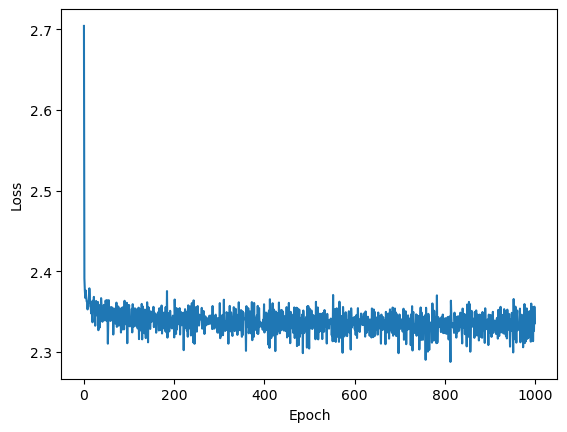

In [123]:
#Part 2 (40 pts) Implement and experiment with batch gradient descent
from sklearn.linear_model import SGDClassifier
lr_model_2 = SGDRegressor(loss='squared_error', alpha=1, n_iter_no_change=3000, verbose=1)
lr_model_2.fit(scaler_train, y_train)
y_pred_2 = lr_model.predict(scaler_test)

print("Prediction on training set:", y_pred_2)
#print("Accuracy on training set:", lr_model.score(X, y))
print(y_test)

from sklearn.metrics import mean_squared_error
rmse_test_2=mean_squared_error(y_test,y_pred_2)
print(rmse_test_2)
y_train_pred_2=lr_model.predict(scaler_train)

rmse_train_2 = mean_squared_error(y_train, y_train_pred_2)
rmse_train

import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

with DisplayLossCurve(print_loss=True):
    lr_model_2.fit(scaler_train, y_train)



=============== Loss Array ===============
[2.402508 1.973802 1.957754 1.947988 1.943206 1.935618 1.942368 1.926838
 1.940637 1.926643 1.93476  1.923971 1.938072 1.933005 1.929779 1.927609
 1.930808 1.93331  1.922594 1.927718 1.921949 1.913767 1.929148 1.927455
 1.919212 1.920227 1.92202  1.922234 1.912394 1.900204 1.918242 1.909131
 1.923332 1.913468 1.91535  1.919087 1.909518 1.915331 1.918093 1.9045
 1.916864 1.902997 1.921804 1.917216 1.918293 1.905023 1.918405 1.918679
 1.922108 1.912987 1.912068 1.920126 1.907367 1.914148 1.922601 1.920131
 1.907134 1.918857 1.917813 1.914849 1.907058 1.911389 1.915469 1.913156
 1.917334 1.909997 1.915176 1.910643 1.916558 1.916804 1.916437 1.916591
 1.911215 1.90532  1.914542 1.907818 1.909348 1.9073   1.916727 1.910584
 1.911816 1.910558 1.907991 1.915731 1.908111 1.914927 1.900436 1.914602
 1.899592 1.912238 1.906083 1.904693 1.910583 1.906647 1.916071 1.910876
 1.906538 1.910309 1.908512 1.911099 1.907059 1.912151 1.911146 1.901166
 1.914263 

c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


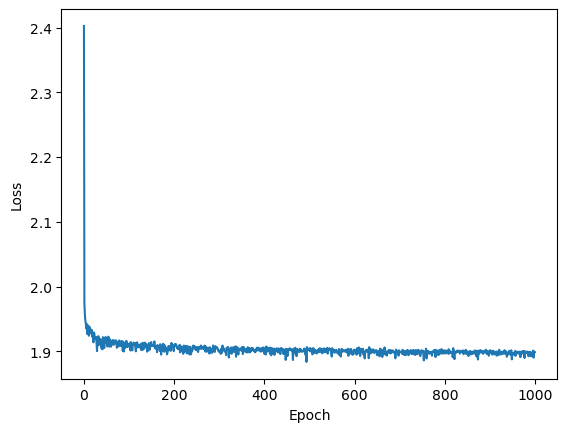

In [124]:
lr_model_3 = SGDRegressor(loss='squared_error', alpha=0.0001, n_iter_no_change=3000, verbose=1)
with DisplayLossCurve(print_loss=True):
    lr_model_3.fit(scaler_train, y_train)